# **Deep Neural Network : Regression**

## **KARTOBI Sofiane**

## **Import**

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston. The following describes the dataset columns:

-  CRIM - per capita crime rate by town
-  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
-  INDUS - proportion of non-retail business acres per town.
-  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-  NOX - nitric oxides concentration (parts per 10 million)
-  RM - average number of rooms per dwelling
-  AGE - proportion of owner-occupied units built prior to 1940
-  DIS - weighted distances to five Boston employment centres
-  RAD - index of accessibility to radial highways
-  TAX - full-value property-tax rate per $10,000
-  PTRATIO - pupil-teacher ratio by town

-  B-1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-  LSTAT - % lower status of the population
-  MEDV - Median value of owner-occupied homes in $1000's


## **Assuring Reproducibility**

In [2]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow/Keras
tf.random.set_seed(42)

## **Retrieve Data**

From the csv file downloaded from Kaggle

In [3]:
data = pd.read_csv("BostonHousing.csv")
display(data.head().style.format("{0:.2f}"))
display(data.info())
print("The shape is :" ,data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

The shape is : (506, 14)


In [4]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
data.shape

(501, 14)

## **Preparing the data**

### Splitting the data

we will use 75% of the data for training and 25% for testing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop("medv",axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
y = data["medv"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Original data shape was : ',data.shape)
print('x_train : ',X_train.shape, 'y_train : ',y_train.shape)
print('x_test : ',X_test.shape, 'y_test : ',y_test.shape)

Original data shape was :  (501, 14)
x_train :  (375, 13) y_train :  (375,)
x_test :  (126, 13) y_test :  (126,)


### Data Normalisation
We will use the min max scaller this time instead of substracting the mean and dividing by std

In [12]:
display(X_train.describe().style.format("{:.2f}").set_caption("Train set Before standardization :"))
display(X_test.describe().style.format("{:.2f}").set_caption("Test set Before standardization :"))

# X_train=(X_train-x_train.mean())/x_train.std()
# X_test=(X_test-x_test.mean())/x_test.std()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00
mean,3.68,12.06,11.25,0.07,0.56,6.30,69.31,3.74,9.81,410.93,18.39,357.52,12.51
std,8.18,23.79,6.86,0.25,0.12,0.71,27.73,2.13,8.80,169.17,2.21,89.68,7.00
min,0.01,0.00,0.46,0.00,0.39,3.56,6.00,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.09,0.00,5.26,0.00,0.45,5.88,45.80,2.08,4.00,278.00,17.00,375.42,7.16
50%,0.30,0.00,9.90,0.00,0.54,6.22,79.80,3.05,5.00,335.00,18.80,391.45,11.41
75%,4.07,20.00,18.10,0.00,0.63,6.64,93.80,5.11,24.00,666.00,20.20,396.21,16.70
max,73.53,95.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,3.55,9.45,10.88,0.08,0.55,6.24,66.14,3.93,8.96,403.82,18.65,352.66,13.05
std,9.90,22.25,6.87,0.27,0.11,0.70,29.58,2.03,8.56,169.14,2.04,97.64,7.64
min,0.01,0.00,1.21,0.00,0.39,3.86,2.90,1.29,1.00,188.00,12.60,3.50,2.47
25%,0.07,0.00,4.98,0.00,0.45,5.89,40.35,2.17,4.00,281.75,17.50,374.83,6.69
50%,0.20,0.00,8.56,0.00,0.52,6.14,71.80,3.71,5.00,311.00,19.20,391.11,11.25
75%,2.02,0.00,18.10,0.00,0.61,6.47,95.30,5.27,8.00,666.00,20.20,396.31,17.06
max,88.98,100.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,21.20,396.90,36.98


Performing min max scaling using the relative min max values from X_train and X_test to avoid information leakage and overfitting

In [13]:
X_train_scaled=(X_train-X_train.min())/(X_train.max()-X_train.min())
X_test_scaled=(X_test-X_test.min())/(X_test.max()-X_test.min())

In [14]:
display(X_train_scaled.describe().style.format("{:.2f}").set_caption(" train set After Min Max Scaling :"))
display(X_test_scaled.describe().style.format("{:.2f}").set_caption("test set After Min Max Scaling :"))
display(X_train_scaled.head().style.format("{:.2f}").set_caption("Few lines of the train set :"))


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00,375.00
mean,0.05,0.13,0.40,0.07,0.35,0.52,0.67,0.24,0.38,0.43,0.62,0.90,0.30
std,0.11,0.25,0.25,0.25,0.24,0.14,0.30,0.19,0.38,0.32,0.23,0.23,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.18,0.00,0.12,0.44,0.42,0.09,0.13,0.17,0.47,0.95,0.15
50%,0.00,0.00,0.35,0.00,0.30,0.51,0.79,0.17,0.17,0.28,0.66,0.99,0.27
75%,0.06,0.21,0.65,0.00,0.50,0.59,0.93,0.36,1.00,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.04,0.09,0.36,0.08,0.33,0.49,0.65,0.28,0.35,0.41,0.70,0.89,0.31
std,0.11,0.22,0.26,0.27,0.24,0.14,0.30,0.22,0.37,0.32,0.24,0.25,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.14,0.00,0.13,0.42,0.39,0.09,0.13,0.18,0.57,0.94,0.12
50%,0.00,0.00,0.28,0.00,0.28,0.47,0.71,0.26,0.17,0.24,0.77,0.99,0.25
75%,0.02,0.00,0.64,0.00,0.47,0.54,0.95,0.42,0.30,0.91,0.88,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
423,0.10,0.00,0.65,0.00,0.46,0.49,0.84,0.08,1.00,0.91,0.81,0.01,0.59
208,0.00,0.00,0.37,1.00,0.20,0.48,0.56,0.28,0.13,0.17,0.64,0.96,0.36
130,0.00,0.00,0.79,0.00,0.48,0.56,0.99,0.09,0.13,0.48,0.91,1.00,0.30
334,0.00,0.00,0.17,0.00,0.26,0.53,0.35,0.48,0.17,0.07,0.81,0.98,0.14
32,0.02,0.00,0.28,0.00,0.30,0.46,0.81,0.26,0.13,0.23,0.89,0.59,0.72


## **Building a network**

### Model Definition

In [15]:
from keras import models
from keras import layers

Since we have a little dataset and to avoid overfitting we should go with a small network (1 or 2 hidden layers)

In [16]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [51]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                896       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### K-cross Validation
Since we have a small dataset picking a sample from training would be very little and subject to a lot of variance. So to grasp a better idea about validation score we use the cross validation approche

In [17]:
# from sklearn.model_selection import cross_val_score, KFold
# # from keras.wrappers.scikit_learn import KerasRegressor

In [18]:
# keras_regressor = KerasRegressor(build_fn=build_model, epochs=60, batch_size=5, verbose=0)

In [19]:
# k_folds = 5

# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform k-fold cross-validation
# cross_val_results = cross_val_score(keras_regressor, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

In [20]:
# cross_val_results

In [23]:
k = 4
num_val_samples = len(X_train_scaled) // k
num_epochs = 300
all_val_mae_histories = []
all_train_mae_histories = []

In [24]:
for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
    [X_train_scaled[:i * num_val_samples],
    X_train_scaled[(i + 1) * num_val_samples:]],
    axis=0)

    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)

    model = build_model()
    # history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)

    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5, verbose=0)

    val_mae_history = history.history['val_mae']
    train_mae_history = history.history['mae']
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_val_mae_histories.append(val_mae_history)
    all_train_mae_histories.append(train_mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [25]:
average_val_mae_history = [
np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

In [26]:
# Calculate the average training loss across all epochs
# average_train_mae_history = np.mean(all_train_mae_histories, axis=0)

In [27]:
average_train_mae_history = [
np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]

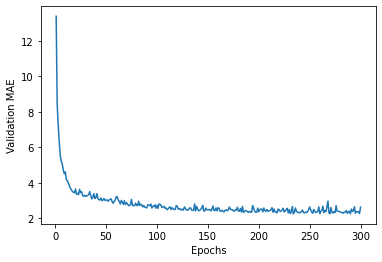

In [28]:
plt.plot(range(1, len(average_val_mae_history) + 1), average_val_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

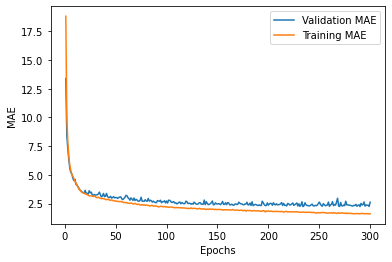

In [29]:
# Plotting both curves on the same plot
plt.plot(range(1, len(average_val_mae_history) + 1), average_val_mae_history, label='Validation MAE')
plt.plot(range(1, len(average_train_mae_history) + 1), average_train_mae_history, label='Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [35]:
print("min(val_mae) : {:.4f}".format(min(average_val_mae_history)))

min(val_mae) : 2.2401


In [41]:
average_val_mae_history==min(average_val_mae_history)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

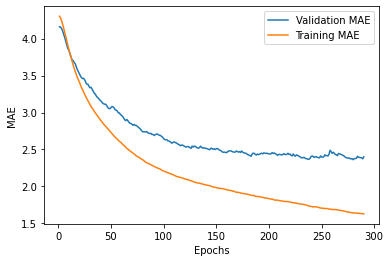

In [30]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_val_mae_history = smooth_curve(average_val_mae_history[10:])
smooth_train_mae_history = smooth_curve(average_train_mae_history[10:])
plt.plot(range(1, len(smooth_val_mae_history) + 1), smooth_val_mae_history, label='Validation MAE')
plt.plot(range(1, len(smooth_train_mae_history) + 1), smooth_train_mae_history, label='Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [42]:
model = build_model()
model.fit(X_train_scaled, y_train,
epochs=290, batch_size=5, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 12.2154 - mae: 2.4518


In [43]:
test_mae_score

2.4518139362335205

### **Final Model**

In [44]:
model = build_model()
model.fit(X_train_scaled, y_train,
epochs=300, batch_size=10, verbose=2)
test_mse_score, test_mae_score = model.evaluate(X_test_scaled, y_test)

Epoch 1/300
38/38 - 1s - loss: 487.1493 - mae: 19.8395 - 888ms/epoch - 23ms/step
Epoch 2/300
38/38 - 0s - loss: 212.8580 - mae: 11.4858 - 110ms/epoch - 3ms/step
Epoch 3/300
38/38 - 0s - loss: 109.1785 - mae: 7.7719 - 108ms/epoch - 3ms/step
Epoch 4/300
38/38 - 0s - loss: 83.5763 - mae: 6.7617 - 109ms/epoch - 3ms/step
Epoch 5/300
38/38 - 0s - loss: 68.6872 - mae: 5.9813 - 109ms/epoch - 3ms/step
Epoch 6/300
38/38 - 0s - loss: 59.6338 - mae: 5.4805 - 115ms/epoch - 3ms/step
Epoch 7/300
38/38 - 0s - loss: 53.1341 - mae: 5.0935 - 160ms/epoch - 4ms/step
Epoch 8/300
38/38 - 0s - loss: 48.6668 - mae: 4.8955 - 114ms/epoch - 3ms/step
Epoch 9/300
38/38 - 0s - loss: 44.5374 - mae: 4.7038 - 109ms/epoch - 3ms/step
Epoch 10/300
38/38 - 0s - loss: 41.1351 - mae: 4.4468 - 230ms/epoch - 6ms/step
Epoch 11/300
38/38 - 0s - loss: 37.8553 - mae: 4.3337 - 236ms/epoch - 6ms/step
Epoch 12/300
38/38 - 0s - loss: 34.3079 - mae: 4.0568 - 244ms/epoch - 6ms/step
Epoch 13/300
38/38 - 0s - loss: 32.2283 - mae: 3.9670 -

In [45]:
test_mae_score

2.1741108894348145

### **Nous avons obtenu un ecart de 2174$ !!!**

## **Making a prediction**

In [46]:
my_data=[1.26425925, -0.48522739, 1.0436489, -0.23112788, 1.37120745,
        -2.14308942, 1.13489104, -1.06802005, 1.71189006, 1.57042287,
        0.77859951, 0.14769795, 2.7585581]
real_price=10.04

### Reverse the standardisation of data

In [47]:
my_data= my_data * np.std(X_train)
my_data = my_data + np.mean(X_train)
my_data

crim        14.015516
zn           0.530770
indus       18.403138
chas         0.009013
nox          0.717663
rm           4.785426
age        100.740675
dis          1.468819
rad         24.847145
tax        676.245952
ptratio     20.104715
b          370.748411
lstat       31.789979
dtype: float64

In [48]:
my_data=(my_data-X_train.min())/(X_train.max()-X_train.min())
my_data

crim       0.190499
zn         0.005587
indus      0.657740
chas       0.009013
nox        0.679881
rm         0.234609
age        1.007880
dis        0.030847
rad        1.036832
tax        0.933675
ptratio    0.798374
b          0.934057
lstat      0.829470
dtype: float64

In [49]:
my_data=np.array(my_data).reshape(-1,13)
my_data.shape

(1, 13)

In [50]:
predictions=model.predict(my_data)
print("Prediction : {:.2f} k$".format(predictions[0][0]))
print("Reality : {:.2f} k$".format(real_price))

1/1 [==============================] - 0s 183ms/step
Prediction : 10.40 k$
Reality : 10.04 k$
